# Task-01
## Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


### Data Overview

In [6]:
house=pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data=house[['GrLivArea','FullBath','HalfBath','BedroomAbvGr','SalePrice']]
data.head()

,GrLivArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1710,2,1,3,208500
1,1262,2,0,3,181500
2,1786,2,1,3,223500
3,1717,1,0,3,140000
4,2198,2,1,4,250000


necessary columns taken according to the question

In [8]:
data.shape

(1460, 5)

In [9]:
data.describe()

,GrLivArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1.565068,0.382877,2.866438,180921.195890
std,525.480383,0.550916,0.502885,0.815778,79442.502883
min,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,1129.500000,1.000000,0.000000,2.000000,129975.000000
50%,1464.000000,2.000000,0.000000,3.000000,163000.000000
75%,1776.750000,2.000000,1.000000,3.000000,214000.000000
max,5642.000000,3.000000,2.000000,8.000000,755000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   FullBath      1460 non-null   int64
 2   HalfBath      1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


## Data Analysis

<Axes: >

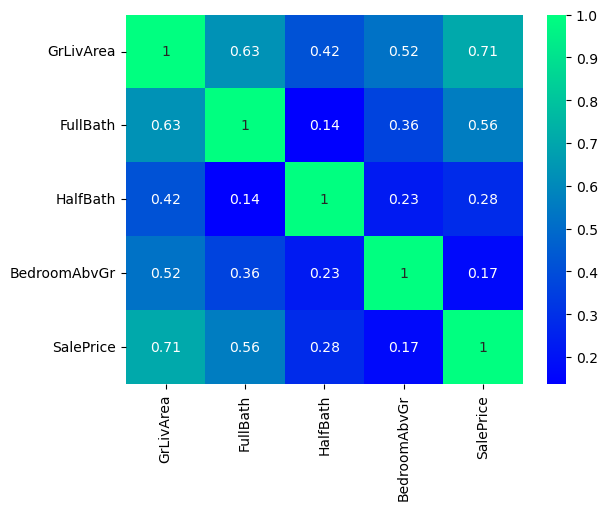

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='winter')

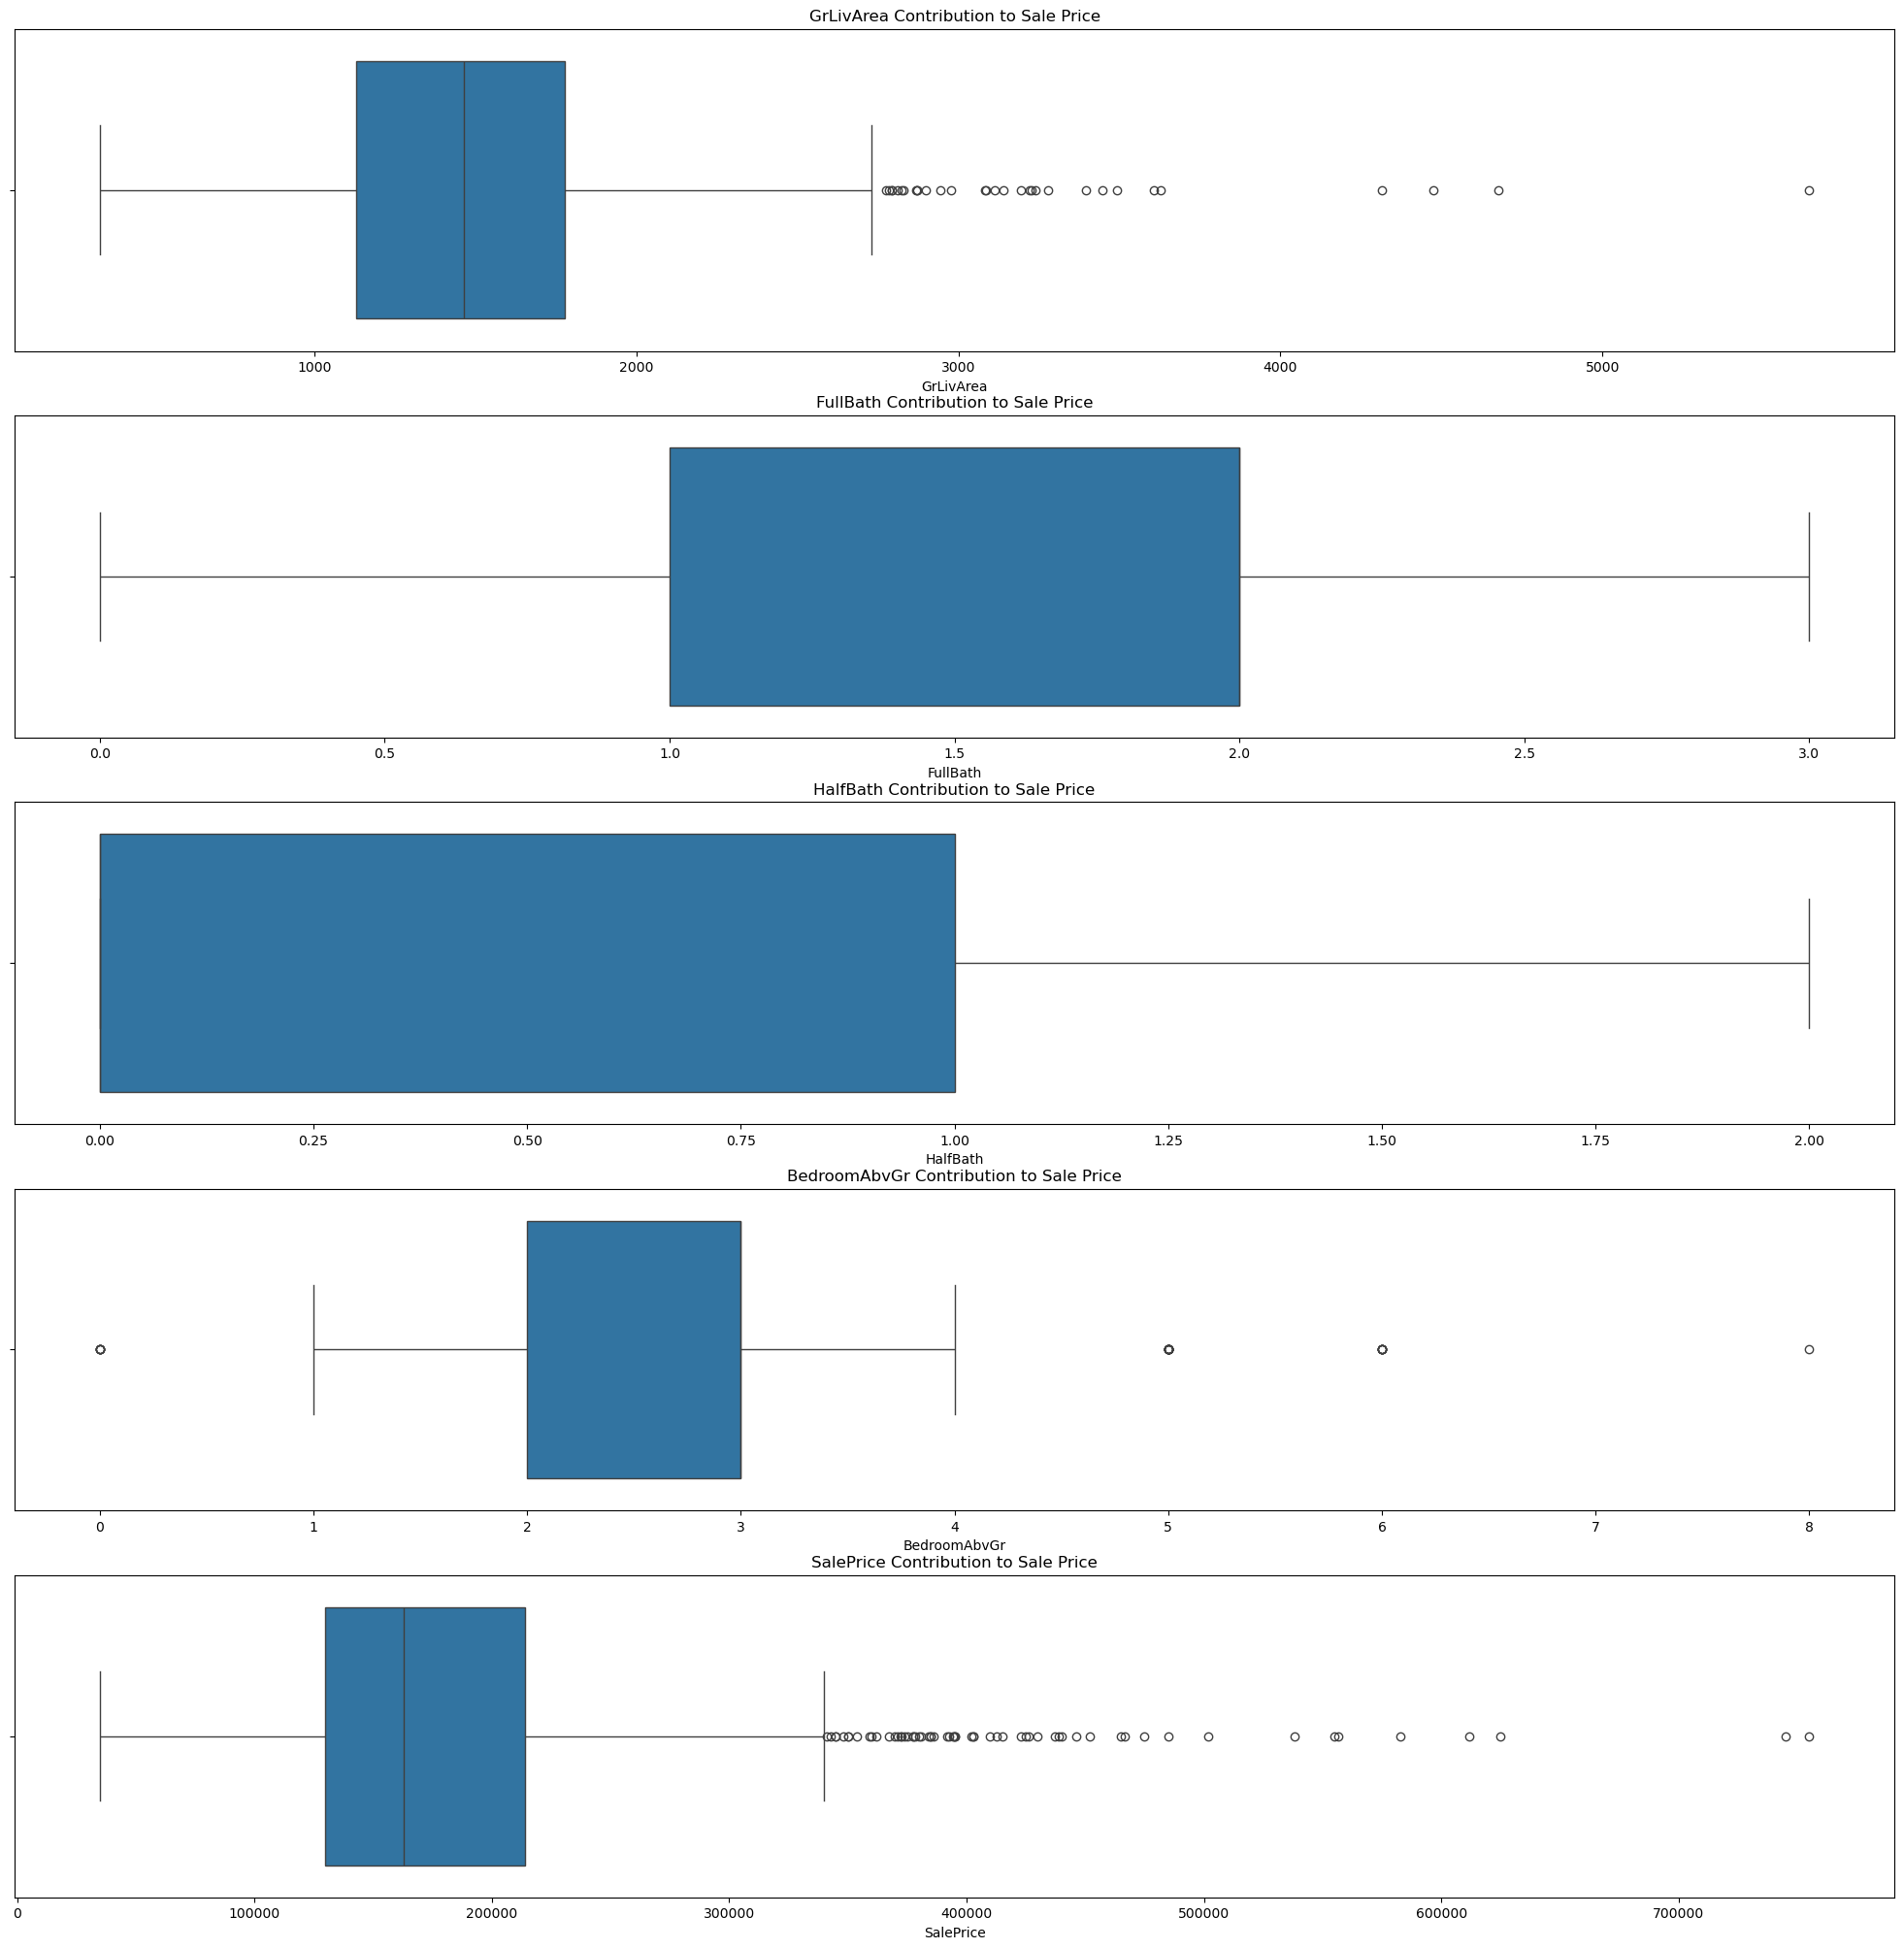

In [12]:
def box_plot(a):
    sns.boxplot(data=data,x=a)
plt.figure(figsize=(25,25))
for i,j in enumerate(data.columns[:5]):
    plt.subplot(5,1,i+1)
    box_plot(j)
    plt.title(f"{j} Contribution to Sale Price")
plt.show()

## Data Cleaning

In [13]:
data.isnull().sum()

GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

##### Since there are no null values , nothing can be cleaned here

## Train and test data

In [14]:
X=data.drop('SalePrice',axis=1)
y=data[['SalePrice']]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=1)

In [18]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
prediction=model.predict(X_test)


In [20]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
np.sqrt(mean_squared_error(y_test,prediction))

49411.874445602894

In [23]:
r2_score(y_test,prediction)

0.6363100847626446

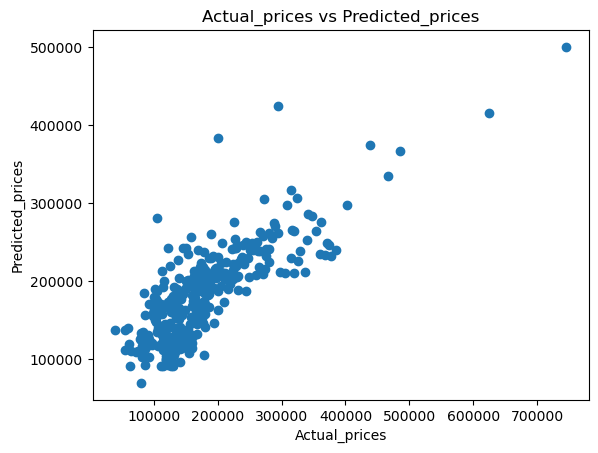

In [24]:
plt.scatter(y_test,prediction)
plt.xlabel('Actual_prices')
plt.ylabel('Predicted_prices')
plt.title('Actual_prices vs Predicted_prices')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2060\306115306.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test,prediction))


<Axes: ylabel='Density'>

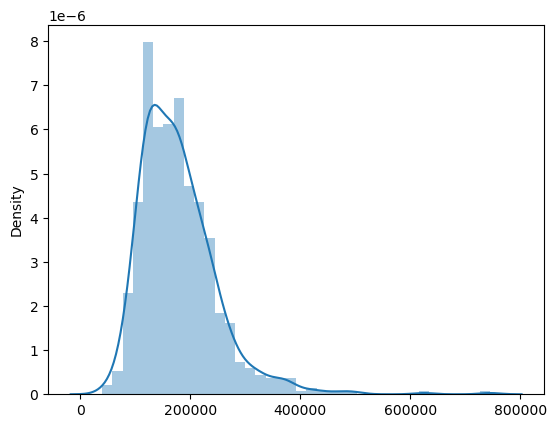

In [26]:
sns.distplot((y_test,prediction))

In [28]:
df=pd.DataFrame({'GrLivArea':[2500],'FullBath':[3],'HalfBath':[0],'BedroomAbvGr':[3]})
y_pred=model.predict(df)
print("Predicted_price=",y_pred)

Predicted_price= [[325205.32629543]]
